<a href="https://colab.research.google.com/github/AmeeAyco/BANK-DATA-MARKETING-/blob/main/MAN_203_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Bank Marketing Classification Exploratory Data Analysis** 

This code was done as a requirement for MAN 203 of Mapua University submitted by Amee Kristin L. Ayco.


### **Objective:**

The goal of the project is to make an exploratory data analysis on the dataset that will be used in creating a model that will classify if a client will subscribe a term deposit.

### **Source**:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing

### **Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets found on the public repository:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

For Exploratory Data Analysis of the MAN 203 project, dataset #1 was used. The dataset found also replaced null with the word "unknown".






### **Attribute Information:**

#### **Input variables:**

*bank client data:*

1) age (numeric)

2) job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3) marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown';  note: 'divorced' means divorced or widowed)

4) education (categorical:  'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

5) default: has credit in default? (categorical: 'no', 'yes', 'unknown')

6) housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

7) loan: has personal loan? (categorical: 'no', 'yes', 'unknown')




*related with the last contact of the current campaign:*

8) contact: contact communication type (categorical: 'cellular', 'telephone')

9) month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10) day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

11) duration: last contact duration, in seconds (numeric).
 *Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*





*other attributes:*

12) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14) previous: number of contacts performed before this campaign and for this client (numeric)

15) poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')




*social and economic context attributes*

16) emp.var.rate: employment variation rate - quarterly indicator (numeric)

17) cons.price.idx: consumer price index - monthly indicator (numeric)

18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19) euribor3m: euribor 3 month rate - daily indicator (numeric)

20) nr.employed: number of employees - quarterly indicator (numeric)




#### **Output variable (desired target):**
21)  y - has the client subscribed a term deposit? (binary: 'yes','no')





### **Code**

In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#print versions
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))



pandas==1.1.5
numpy==1.19.5
seaborn==0.11.2


In [11]:
# CSV Data were read from the folder. separate texts using delimeter   
url = 'https://raw.githubusercontent.com/AmeeAyco/BANK-DATA-MARKETING-/main/bank-additional-full.csv'
missing= ["unknown"] 
df_Bank_Data = pd.read_csv(url,na_values=missing, sep=";")



In [12]:
#output the column name output the date type. since the 
df_Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
#count missing values
def Count_NaN():
    NaN_0=pd.DataFrame(df_Bank_Data.isnull().sum().sort_values(ascending=False),columns = ["Count NaN"])
    NaN_0["% NaN"]=(df_Bank_Data.isna().sum()/len(df_Bank_Data)*100)
    return NaN_0.round(2)
Count_NaN()

,Count NaN,% NaN
default,8597,20.87
education,1731,4.20
housing,990,2.40
loan,990,2.40
job,330,0.80
marital,80,0.19
y,0,0.00
day_of_week,0,0.00
contact,0,0.00
month,0,0.00


The count of missing can be ignored since only there are no field which has 40% and above percentage of missing values. 

In [ ]:
df_Bank_Data.loc[df_Bank_Data['job'].isin(selected_words),'job'].value_counts()  

In [ ]:
#basic descriptive analysis on the numerical fields of df_Bank_Data
df_Bank_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


From here, we can already notice that the field "previous" have a lot of 0 values as it comprises the 25% to 75% of the quartile. Let's count the number of zeros on the field, "previous".

In [18]:
(df_Bank_Data['previous'] == 0).sum()

35563

In [23]:
(((df_Bank_Data['previous'] == 0).sum()/df_Bank_Data['previous'] .count())*100).round(2)

86.34

86.34% are first time to be called for the campaign. this value also affects the field "pdays" because by default those who have never been contacted before were assigned with 999 days.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa16d2b10>,
      dtype=object)

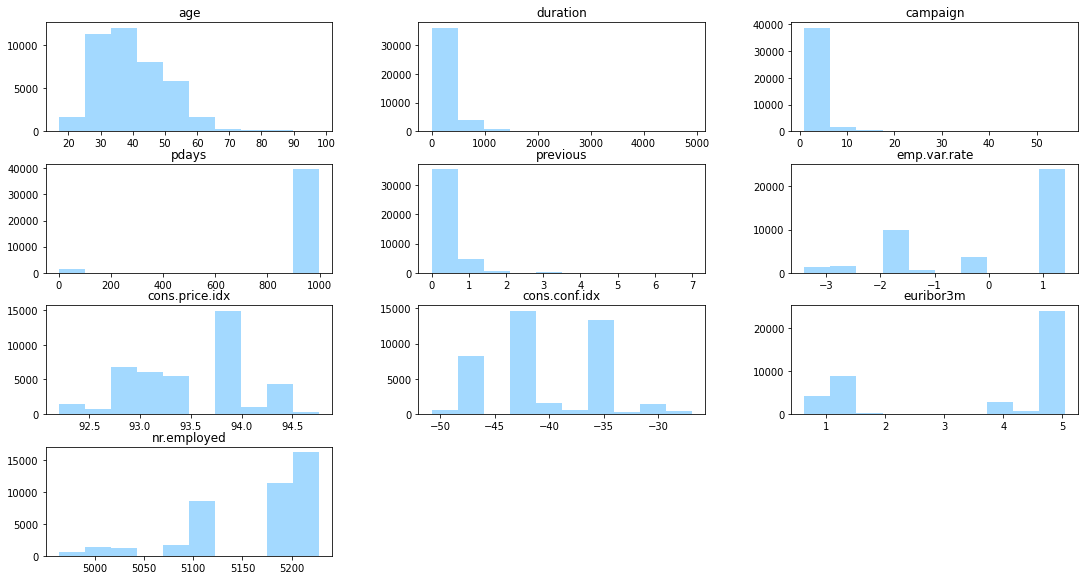

In [ ]:
#histogram of numerical fields of df_Bank_Data
f, axes = plt.subplots(1, 12, figsize=(15,8))
f.tight_layout()
font={'weight' : 'bold',
        'size': 12}


df_Bank_Data.hist(figsize=(100,100),color='#A3D9FF',ax=axes[0], grid=False)

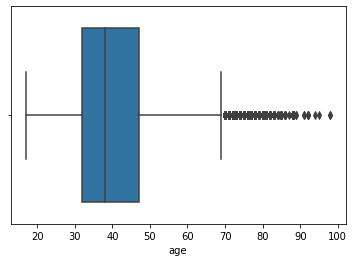

In [ ]:
#print the boxplots of each numerical field

sns.boxplot(df_Bank_Data["age"])




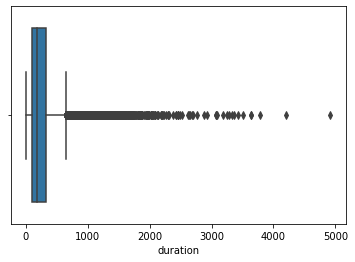

In [ ]:
sns.boxplot(df_Bank_Data["duration"])


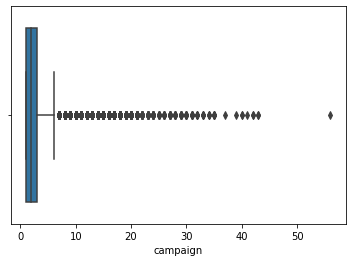

In [ ]:
sns.boxplot(df_Bank_Data["campaign"])


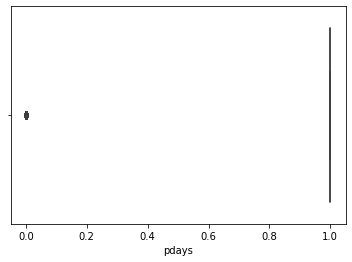

In [24]:
sns.boxplot(df_Bank_Data["pdays"]== 999)


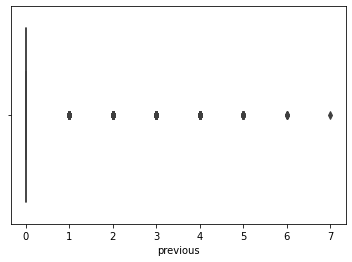

In [ ]:
sns.boxplot(df_Bank_Data["previous"])

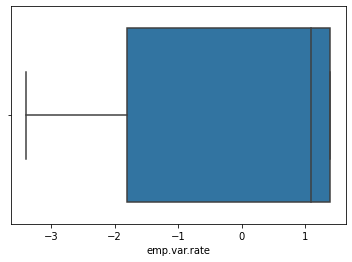

In [ ]:
sns.boxplot(df_Bank_Data["emp.var.rate"])

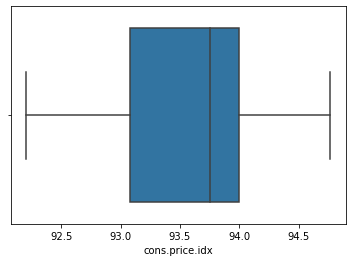

In [ ]:
sns.boxplot(df_Bank_Data["cons.price.idx"])

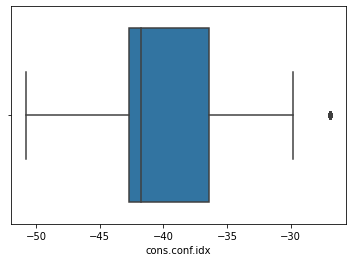

In [ ]:
sns.boxplot(df_Bank_Data["cons.conf.idx"])

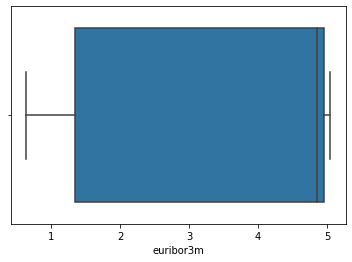

In [ ]:
sns.boxplot(df_Bank_Data["euribor3m"])

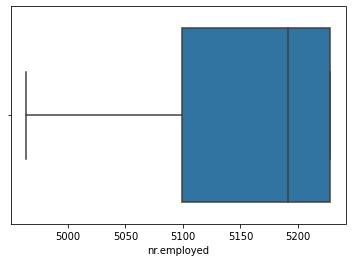

In [ ]:
sns.boxplot(df_Bank_Data["nr.employed"])

In [ ]:
#print the mean of each numerical field
df_Bank_Data.mean(numeric_only=True)

age                 40.024060
duration           258.285010
campaign             2.567593
pdays              962.475454
previous             0.172963
emp.var.rate         0.081886
cons.price.idx      93.575664
cons.conf.idx      -40.502600
euribor3m            3.621291
nr.employed       5167.035911
dtype: float64

In [ ]:
#print the median of each numerical field

df_Bank_Data.median(numeric_only= True)

age                 38.000
duration           180.000
campaign             2.000
pdays              999.000
previous             0.000
emp.var.rate         1.100
cons.price.idx      93.749
cons.conf.idx      -41.800
euribor3m            4.857
nr.employed       5191.000
dtype: float64

In [ ]:
#print the standard dev of each numerical field
df_Bank_Data.std(numeric_only= True)

age                10.421250
duration          259.279249
campaign            2.770014
pdays             186.910907
previous            0.494901
emp.var.rate        1.570960
cons.price.idx      0.578840
cons.conf.idx       4.628198
euribor3m           1.734447
nr.employed        72.251528
dtype: float64

In [ ]:
#print the range of each numerical field
df_Bank_Data.max(numeric_only = True) - df_Bank_Data.min(numeric_only = True)

age                 81.000
duration          4918.000
campaign            55.000
pdays              999.000
previous             7.000
emp.var.rate         4.800
cons.price.idx       2.566
cons.conf.idx       23.900
euribor3m            4.411
nr.employed        264.500
dtype: float64

In [ ]:
#print the quartiles of each numerical field

df_Bank_Data.quantile([0, 0.25, 0.50, 0.75,1])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0.00,17.0,0.0,1.0,0.0,0.0,-3.4,92.201,-50.8,0.634,4963.6
0.25,32.0,102.0,1.0,999.0,0.0,-1.8,93.075,-42.7,1.344,5099.1
0.50,38.0,180.0,2.0,999.0,0.0,1.1,93.749,-41.8,4.857,5191.0
0.75,47.0,319.0,3.0,999.0,0.0,1.4,93.994,-36.4,4.961,5228.1
1.00,98.0,4918.0,56.0,999.0,7.0,1.4,94.767,-26.9,5.045,5228.1


In [ ]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['age']
s= skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness 0.785 z-score 57.755 p-value 0.000


In [ ]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['age']
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis 0.791 z-score 23.859 p-value 0.000


In [ ]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['duration']
s= skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness 3.263 z-score 141.693 p-value 0.000


In [ ]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['duration']
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis 20.245 z-score 100.288 p-value 0.000


In [ ]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['campaign']
s= skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness 4.762 z-score 166.738 p-value 0.000


In [ ]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['campaign']
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis 36.975 z-score 111.707 p-value 0.000


In [ ]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['pdays']
s= skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness -4.922 z-score -168.939 p-value 0.000


In [ ]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['pdays']
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis 22.227 z-score 102.180 p-value 0.000


In [ ]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['previous']
s= skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness 3.832 z-score 152.290 p-value 0.000


In [ ]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['previous']
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis 20.106 z-score 100.147 p-value 0.000


In [ ]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['emp.var.rate']
s= skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness -0.724 z-score -54.066 p-value 0.000


In [ ]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['emp.var.rate']
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis -1.063 z-score -116.097 p-value 0.000


In [ ]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['cons.price.idx']
s= skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness -0.231 z-score -18.887 p-value 0.000


In [ ]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['cons.price.idx']
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis -0.830 z-score -63.512 p-value 0.000


In [ ]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['cons.conf.idx']
s= skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness 0.303 z-score 24.579 p-value 0.000


In [ ]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['cons.conf.idx']
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis -0.359 z-score -18.227 p-value 0.000


In [ ]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['euribor3m']
s= skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness -0.709 z-score -53.137 p-value 0.000


In [ ]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['euribor3m']
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis -1.407 z-score 603.455 p-value 0.000


In [ ]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['nr.employed']
s= skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness -1.044 z-score -72.100 p-value 0.000


In [ ]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['nr.employed']
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis -0.004 z-score -0.144 p-value 0.885


In [ ]:
pcts=[0,0.25,0.5,0.75,1]

In [ ]:
bankdataset_binned = pd.concat([pd.qcut(df_Bank_Data.iloc[:, 0],pcts, precision=1,duplicates='drop'), 
                                pd.qcut(df_Bank_Data.iloc[:, 10], pcts, precision=1,duplicates='drop'), 
                                pd.qcut(df_Bank_Data.iloc[:, 11], pcts, precision=1,duplicates='drop'), 
                                pd.qcut(df_Bank_Data.iloc[:, 12], pcts, precision=1,duplicates='drop'),
                                pd.qcut(df_Bank_Data.iloc[:, 13], pcts, precision=1,duplicates='drop'),
                                pd.qcut(df_Bank_Data.iloc[:, 15], pcts, precision=1,duplicates='drop'),
                                pd.qcut(df_Bank_Data.iloc[:, 16], pcts, precision=1,duplicates='drop'),
                                pd.qcut(df_Bank_Data.iloc[:, 17], pcts, precision=1,duplicates='drop'),
                                pd.qcut(df_Bank_Data.iloc[:, 18], pcts, precision=1,duplicates='drop'),
                                pd.qcut(df_Bank_Data.iloc[:, 19], pcts, precision=1,duplicates='drop'),
                                ], join ='outer', axis = 1)

In [ ]:
bankdataset_binned.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,4,4,3,1,1,3,4,4,4,3
top,"(16.9, 32.0]","(102.0, 180.0]","(0.9, 2.0]","(-0.1, 999.0]","(-0.1, 7.0]","(1.1, 1.4]","(93.7, 94.0]","(-50.9, -42.7]","(1.34, 4.86]","(5191.0, 5228.1]"
freq,11176,10392,28212,41188,41188,16234,14727,15561,11512,19917


In [ ]:
pd.crosstab(df_Bank_Data['job'], df_Bank_Data['y'])

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [ ]:
pd.crosstab( bankdataset_binned['age'],df_Bank_Data['y'])

y,no,yes
age,,
"(16.9, 32.0]",9648,1528
"(32.0, 38.0]",9004,995
"(38.0, 47.0]",9344,796
"(47.0, 98.0]",8552,1321


In [ ]:
pd.crosstab( df_Bank_Data['marital'],df_Bank_Data['y'])

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [ ]:
pd.crosstab( df_Bank_Data['job'], [df_Bank_Data['marital'], df_Bank_Data['y']])

marital       divorced      married      single      unknown    
y                   no  yes      no  yes     no  yes      no yes
job                                                             
admin.            1148  132    4601  652   3309  566      12   2
blue-collar        675   53    6266  421   1664  161      11   3
entrepreneur       165   14     983   88    182   21       2   1
housemaid          145   16     703   74    103   16       3   0
management         292   39    1863  226    438   63       3   0
retired            256   92     945  329     81   12       4   1
self-employed      117   16     822   82    328   51       5   0
services           499   33    2128  166   1013  124       6   0
student              6    3      33    8    560  264       1   0
technician         709   65    3286  384   2008  279      10   2
unemployed         114   10     548   86    203   48       5   0
unknown             10    3     218   16     59   15       6   3

In [ ]:
pd.crosstab( df_Bank_Data['education'], [df_Bank_Data['marital'], df_Bank_Data['y']])

marital             divorced      married      single      unknown    
y                         no  yes      no  yes     no  yes      no yes
education                                                             
basic.4y                 406   83    2915  313    422   31       5   1
basic.6y                 169   13    1628  139    301   36       6   0
basic.9y                 534   31    3858  298   1174  142       6   2
high.school             1086  107    4683  475   2702  448      13   1
illiterate                 1    1      12    3      1    0       0   0
professional.course      596   61    2799  357   1247  177       6   0
university.degree       1177  160    5573  821   3723  683      25   6
unknown                  167   20     928  126    378  103       7   2

In [ ]:
pd.crosstab(df_Bank_Data['education'],df_Bank_Data['y'] )

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [ ]:
pd.crosstab(df_Bank_Data['default'],df_Bank_Data['y'] )

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


In [ ]:
pd.crosstab(df_Bank_Data['housing'],df_Bank_Data['y'])

housing,no,unknown,yes
y,,,
no,16596,883,19069
yes,2026,107,2507


In [ ]:
pd.crosstab(df_Bank_Data['loan'],df_Bank_Data['y'])

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


In [ ]:
pd.crosstab(df_Bank_Data['contact'],df_Bank_Data['y'])

y,no,yes
contact,,
cellular,22291,3853
telephone,14257,787


In [ ]:
pd.crosstab(df_Bank_Data['month'],df_Bank_Data['y'])

y,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


In [ ]:
pd.crosstab(bankdataset_binned['duration'],df_Bank_Data['y'])

y,no,yes
duration,,
"(-0.1, 102.0]",10226,87
"(102.0, 180.0]",9915,477
"(180.0, 319.0]",9120,1077
"(319.0, 4918.0]",7287,2999


In [ ]:
pd.crosstab(bankdataset_binned['campaign'],df_Bank_Data['y'])

y,no,yes
campaign,,
"(0.9, 2.0]",24701,3511
"(2.0, 3.0]",4767,574
"(3.0, 56.0]",7080,555


In [ ]:
pd.crosstab(df_Bank_Data['pdays'],df_Bank_Data['y'])

y,no,yes
pdays,,
0,5,10
1,18,8
2,24,37
3,141,298
4,55,63
5,17,29
6,123,289
7,20,40
8,6,12


In [ ]:
pd.crosstab(df_Bank_Data['previous'],df_Bank_Data['y'])

y,no,yes
previous,,
0,32422,3141
1,3594,967
2,404,350
3,88,128
4,32,38
5,5,13
6,2,3
7,1,0


In [ ]:
pd.crosstab(df_Bank_Data['poutcome'],df_Bank_Data['y'])

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


In [ ]:
pd.crosstab(bankdataset_binned['emp.var.rate'],df_Bank_Data['y'])

y,no,yes
emp.var.rate,,
"(-3.5, -1.8]",9493,2597
"(-1.8, 1.1]",11687,1177
"(1.1, 1.4]",15368,866


In [ ]:
pd.crosstab(bankdataset_binned['nr.employed'],df_Bank_Data['y'])

y,no,yes
nr.employed,,
"(4963.5, 5099.1]",10197,3301
"(5099.1, 5191.0]",7532,241
"(5191.0, 5228.1]",18819,1098


In [ ]:
pd.crosstab(bankdataset_binned['cons.price.idx'],df_Bank_Data['y'])

y,no,yes
cons.price.idx,,
"(92.10000000000001, 93.1]",9221,2229
"(93.1, 93.7]",8521,708
"(93.7, 94.0]",13916,811
"(94.0, 94.8]",4890,892


In [ ]:
pd.crosstab(bankdataset_binned['cons.conf.idx'],df_Bank_Data['y'])

y,no,yes
cons.conf.idx,,
"(-50.9, -42.7]",13910,1651
"(-42.7, -41.8]",7612,378
"(-41.8, -36.4]",8612,1221
"(-36.4, -26.9]",6414,1390


In [ ]:
pd.crosstab(bankdataset_binned['euribor3m'],df_Bank_Data['y'])

y,no,yes
euribor3m,,
"(0.62, 1.34]",7867,2676
"(1.34, 4.86]",10562,950
"(4.86, 4.96]",8867,475
"(4.96, 5.04]",9252,539
